In [4]:
%matplotlib inline

import pandas as pd
import numpy as np

import networkx as nx


import matplotlib.pyplot as plt

import datetime
import sys
sys.path.append('../helper_libraries')

In [5]:
def get_all_node_metrics(G):
    """Return node metrics for the graph
    
    Input:
    ------
        G: networkx graph
    
    Returns:
    --------
        a dataframe containing metrics for each node. 
        currently following centrality measures along with 
        node level clustering coefficients are supported:
            degree, betweenness, closeness, eigenvector
    """
    df = pd.DataFrame(index=G.nodes)
    metric_dict = {
        "degree": nx.degree_centrality,
        "betweenness": nx.betweenness_centrality,
        "closeness": nx.closeness_centrality,
        "eigenvector": nx.eigenvector_centrality,
        "clustering": nx.clustering
    }
    for k, f in metric_dict.items():
        try:
            value_dict = f(G)
            nx.set_node_attributes(G, value_dict, k)
            df[k] = pd.Series(value_dict)
        except:
            df[k] = np.nan
    return df

In [51]:
G = nx.read_edgelist('/Users/Morello/Network-Analysis-Spring-2018/data/ananlysis_with_weight.txt', nodetype=str, data=(('weight',str),), create_using=nx.Graph())
G.edges(data=True)

EdgeDataView([('9755', '4235', {'weight': '4'}), ('9755', '1312', {'weight': '1'}), ('9755', '5400', {'weight': '5'}), ('9755', '1151', {'weight': '8'}), ('9755', '1374', {'weight': '8'}), ('9755', '1625', {'weight': '1'}), ('9755', '5532', {'weight': '10'}), ('9755', '3334', {'weight': '1'}), ('9755', '1632', {'weight': '1'}), ('9755', '243', {'weight': '1'}), ('9755', '5520', {'weight': '5'}), ('9755', '6424', {'weight': '1'}), ('9755', '2748', {'weight': '19'}), ('9755', '6334', {'weight': '1'}), ('9755', '6341', {'weight': '1'}), ('9755', '1340', {'weight': '5'}), ('9755', '3043', {'weight': '1'}), ('9755', '3534', {'weight': '1'}), ('9755', '6731', {'weight': '8'}), ('9755', '4651', {'weight': '1'}), ('9755', '4276', {'weight': '1'}), ('9755', '352', {'weight': '1'}), ('9755', '7533', {'weight': '1'}), ('9755', '3333', {'weight': '1'}), ('9755', '5034', {'weight': '4'}), ('9755', '4573', {'weight': '1'}), ('9755', '311', {'weight': '1'}), ('9755', '5747', {'weight': '9'}), ('9755'

In [53]:
df_weight = pd.read_csv('/Users/Morello/Network-Analysis-Spring-2018/data/ananlysis_with_weight.txt', delim_whitespace=True, 
                   header=None, names=['stop1', 'stop2', 'weight'])
df_weight

,stop1,stop2,weight
0,9755,4235,4
1,7322,3715,1
2,4045,1232,2
3,4543,2437,1
4,6170,2271,2
5,1422,2,2
6,5213,3601,7
7,9564,2460,1
8,7423,5745,1
9,6301,3539,1


In [54]:
df_degree = pd.DataFrame(list(dict(G.degree()).items()), columns=["node", "degree"])
df_degree

,node,degree
0,9755,303
1,4235,129
2,7322,155
3,3715,153
4,4045,303
5,1232,175
6,4543,164
7,2437,299
8,6170,126
9,2271,76


In [55]:
df_degree.sort_values("degree", ascending=False).head(10)

,node,degree
197,4568,542
68,6462,489
119,7311,470
350,4360,450
558,6052,430
107,2353,426
229,2674,424
255,7533,424
80,4276,424
620,3452,421


(-0.9281625365621685,
 1.0950838944697172,
 -0.7663387023024792,
 0.7883657237341268)

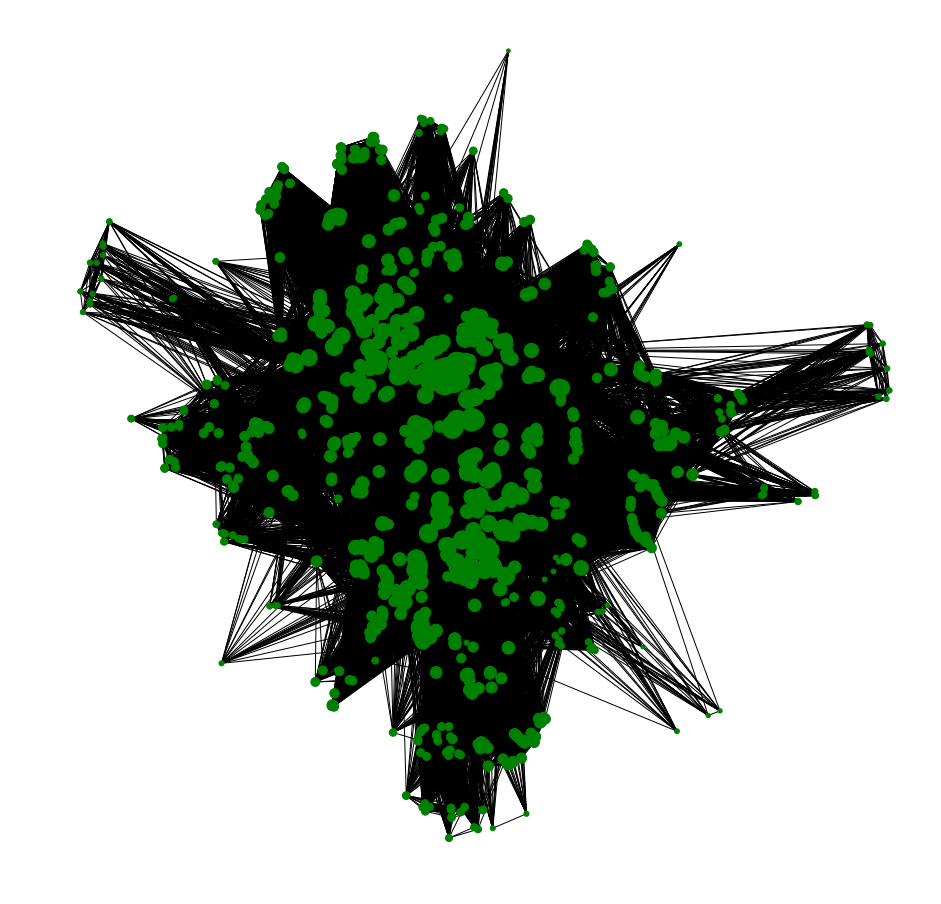

In [56]:
fig, ax = plt.subplots(1,1, figsize=(16,16))
nx.draw_networkx(
    G, with_labels=False,
    node_size=[x[1]*1 for x in G.degree()],
    node_color="g",
    font_size=8,
    ax=ax)
ax.axis("off")

In [57]:
from utilities import plot_network

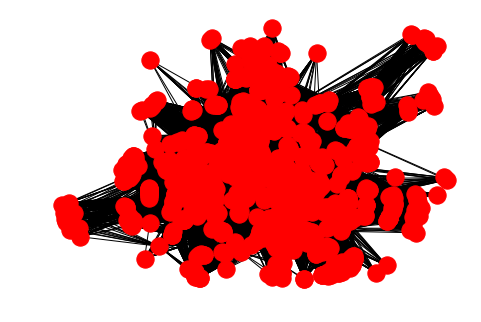

In [69]:
nx.draw(G)

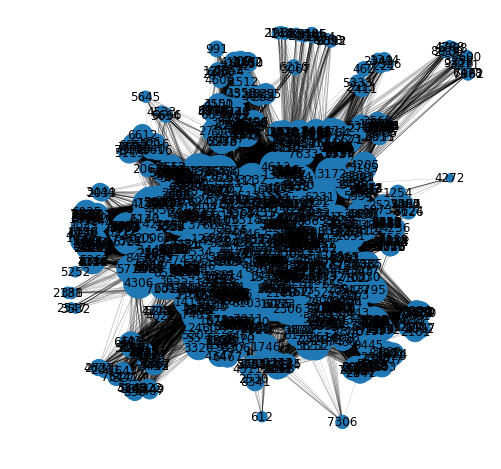

In [68]:
plot_network(G, dict([x for x in G.degree]), factor=5)

In [58]:
from utilities import dict_to_values
from utilities import get_all_node_metrics

Text(0,0.5,'Frequency')

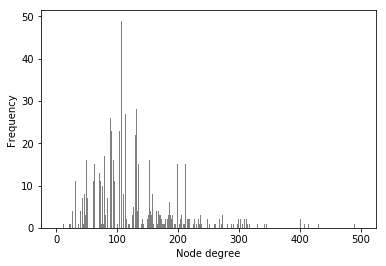

In [59]:
node_degrees = dict_to_values(G, G.degree)
plt.hist(node_degrees, bins=range(500), facecolor="0.5")
plt.xlabel("Node degree")
plt.ylabel("Frequency")

In [60]:
df_t = get_all_node_metrics(G)
df_t

,degree,betweenness,closeness,eigenvector,clustering
9755,0.303912,0.005388,0.582360,0.054856,0.397635
4235,0.129388,0.000540,0.520627,0.017870,0.653343
7322,0.155466,0.000625,0.519812,0.034588,0.577796
3715,0.153460,0.000096,0.525013,0.039367,0.799622
4045,0.303912,0.013934,0.581680,0.043165,0.274408
1232,0.175527,0.000715,0.543324,0.041702,0.651757
4543,0.164493,0.000378,0.530601,0.042202,0.689286
2437,0.299900,0.003453,0.587854,0.069306,0.399228
6170,0.126379,0.000324,0.511544,0.025758,0.605714
2271,0.076229,0.000055,0.498749,0.015608,0.840351


In [62]:
sort_column = "degree"
df_t.sort_values(sort_column, ascending=False).head(10)

,degree,betweenness,closeness,eigenvector,clustering
4568,0.543631,0.024278,0.686639,0.108131,0.265867
6462,0.490471,0.029420,0.662458,0.097336,0.277901
7311,0.471414,0.010896,0.654199,0.100786,0.306220
4360,0.451354,0.026095,0.640334,0.077367,0.272527
6052,0.431294,0.010468,0.635842,0.095014,0.332000
2353,0.427282,0.008330,0.635842,0.095194,0.339431
2674,0.425276,0.008867,0.635032,0.091922,0.329631
7533,0.425276,0.008867,0.635032,0.091922,0.329631
4276,0.425276,0.008867,0.635032,0.091922,0.329631
3452,0.422267,0.009026,0.633821,0.094092,0.339453


In [61]:
sort_column = "betweenness"
df_t.sort_values(sort_column, ascending=False).head(10)

,degree,betweenness,closeness,eigenvector,clustering
6462,0.490471,0.029420,0.662458,0.097336,0.277901
4360,0.451354,0.026095,0.640334,0.077367,0.272527
4568,0.543631,0.024278,0.686639,0.108131,0.265867
3014,0.330993,0.018308,0.595224,0.058080,0.298701
5451,0.408225,0.016738,0.623905,0.075800,0.289975
4164,0.374122,0.016698,0.610159,0.061193,0.284499
4045,0.303912,0.013934,0.581680,0.043165,0.274408
2021,0.312939,0.013739,0.592747,0.056514,0.369569
6514,0.218656,0.013703,0.522537,0.025301,0.393565
1242,0.316951,0.012487,0.586126,0.045529,0.318987


In [63]:
sort_column = "closeness"
df_t.sort_values(sort_column, ascending=False).head(10)

,degree,betweenness,closeness,eigenvector,clustering
4568,0.543631,0.024278,0.686639,0.108131,0.265867
6462,0.490471,0.029420,0.662458,0.097336,0.277901
7311,0.471414,0.010896,0.654199,0.100786,0.306220
4360,0.451354,0.026095,0.640334,0.077367,0.272527
6052,0.431294,0.010468,0.635842,0.095014,0.332000
2353,0.427282,0.008330,0.635842,0.095194,0.339431
4276,0.425276,0.008867,0.635032,0.091922,0.329631
2674,0.425276,0.008867,0.635032,0.091922,0.329631
7533,0.425276,0.008867,0.635032,0.091922,0.329631
3452,0.422267,0.009026,0.633821,0.094092,0.339453


In [64]:
sort_column = "eigenvector"
df_t.sort_values(sort_column, ascending=False).head(10)

,degree,betweenness,closeness,eigenvector,clustering
4568,0.543631,0.024278,0.686639,0.108131,0.265867
7311,0.471414,0.010896,0.654199,0.100786,0.306220
6462,0.490471,0.029420,0.662458,0.097336,0.277901
2353,0.427282,0.008330,0.635842,0.095194,0.339431
6052,0.431294,0.010468,0.635842,0.095014,0.332000
3452,0.422267,0.009026,0.633821,0.094092,0.339453
3534,0.414243,0.006903,0.629022,0.093345,0.346553
7533,0.425276,0.008867,0.635032,0.091922,0.329631
2674,0.425276,0.008867,0.635032,0.091922,0.329631
4276,0.425276,0.008867,0.635032,0.091922,0.329631


In [65]:
sort_column = "clustering"
df_t.sort_values(sort_column, ascending=False).head(10)

,degree,betweenness,closeness,eigenvector,clustering
1134,0.029087,0.0,0.388542,0.003192,1.0
1643,0.061184,0.0,0.443900,0.006399,1.0
3321,0.107322,0.0,0.469397,0.016132,1.0
1207,0.089268,0.0,0.453594,0.017605,1.0
429,0.089268,0.0,0.453594,0.017605,1.0
3742,0.089268,0.0,0.453594,0.017605,1.0
4377,0.107322,0.0,0.469397,0.016132,1.0
6346,0.107322,0.0,0.469397,0.016132,1.0
4751,0.113340,0.0,0.516313,0.031488,1.0
9405,0.049147,0.0,0.406441,0.003413,1.0


In [66]:
from utilities import get_connected_components, get_all_node_metrics, get_all_graph_metrics

In [67]:
df_graph_metrics = get_all_graph_metrics(G)
df_graph_metrics

,values
avg. path length,2.027501
clustering coefficents,0.774722
density,0.134084
transitivity,0.571546
connected components,1.000000
diameter,4.000000
radius,2.000000


In [29]:
nx.density(G1)

0.1744768854105499